## Consumption analysis
### Author : Nicolas Lacroix (https://github.com/NicolasLacroix)

Licence : [Apache License 2.0]

Data provided by [DataSud]

Source file link (csv) : https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv

[DataSud]: https://www.datasud.fr/

[Apache License 2.0]: https://github.com/NicolasLacroix/data-representation/blob/master/LICENSE

In [53]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import dateutil.parser
from datetime import datetime, date

In [54]:
data_link = 'https://trouver.datasud.fr/dataset/8bfa93b0-ac2f-4148-b550-0ec5c917bb28/resource/52a8f5dd-758d-4e54-a837-8fc7ad57d378/download/eco2mix-regional-tr.csv'
data = pd.read_csv(data_link, delimiter=';', encoding='utf_8', parse_dates=True)

In [55]:
data.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,00:45,2020-02-01T00:45:00+01:00,5038.0,308.0,NaN,6.0,...,NaN,0.12,12.50,0.0,0.0,27.61,42.59,1.89,32.42,NaN
1,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,02:45,2020-02-01T02:45:00+01:00,4867.0,308.0,NaN,5.0,...,NaN,0.10,10.42,0.0,0.0,22.54,33.59,1.93,32.08,NaN
2,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,03:45,2020-02-01T03:45:00+01:00,4658.0,308.0,NaN,5.0,...,NaN,0.11,10.42,0.0,0.0,23.68,33.77,2.04,32.42,NaN
3,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,04:15,2020-02-01T04:15:00+01:00,4585.0,308.0,NaN,6.0,...,NaN,0.13,12.50,0.0,0.0,24.21,33.99,2.05,32.08,NaN
4,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,05:00,2020-02-01T05:00:00+01:00,4545.0,308.0,NaN,5.0,...,NaN,0.11,10.42,0.0,0.0,24.18,33.65,2.09,32.42,NaN


In [56]:
# TODO: use parse_date=True in pd.read_csv method instead
data['Date'] = pd.to_datetime(data['Date'])
data['Heure'] = pd.to_datetime(data['Heure'], format='%H:%M', utc=True).dt.time
data['Date - Heure'] = pd.to_datetime(data['Date - Heure'], format='%Y-%m-%dT%H:%M:%S', utc=True)
data['Date - Heure'] = data['Date - Heure'].dt.tz_convert('Europe/Paris')
data.dtypes

Code INSEE région                             int64
Région                                       object
Nature                                       object
Date                                 datetime64[ns]
Heure                                        object
Date - Heure           datetime64[ns, Europe/Paris]
Consommation (MW)                           float64
Thermique (MW)                              float64
Nucléaire (MW)                              float64
Eolien (MW)                                 float64
Solaire (MW)                                float64
Hydraulique (MW)                            float64
Pompage (MW)                                float64
Bioénergies (MW)                            float64
Ech. physiques (MW)                         float64
TCO Thermique (%)                           float64
TCH Thermique (%)                           float64
TCO Nucléaire (%)                           float64
TCH Nucléaire (%)                           float64
TCO Eolien (

In [57]:
volumeLabels = list(data.columns.values)[6:15]
percentLabels = list(data.columns.values)[15:-1]

In [58]:
# Sorting data by ['Date - Heure']
data = data.sort_values(by=['Date - Heure'])
data.head()

,Code INSEE région,Région,Nature,Date,Heure,Date - Heure,Consommation (MW),Thermique (MW),Nucléaire (MW),Eolien (MW),...,TCH Nucléaire (%),TCO Eolien (%),TCH Eolien (%),TCO Solaire (%),TCH Solaire (%),TCO Hydraulique (%),TCH Hydraulique (%),TCO Bioénergies (%),TCH Bioénergies (%),Column 26
751,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,00:00:00,2020-02-01 00:00:00+01:00,5397.0,323.0,NaN,4.0,...,NaN,0.07,8.33,0.0,0.0,29.98,49.54,1.74,32.08,NaN
1466,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,00:15:00,2020-02-01 00:15:00+01:00,5365.0,308.0,NaN,5.0,...,NaN,0.09,10.42,0.0,0.0,27.98,45.96,1.75,32.08,NaN
2891,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,00:30:00,2020-02-01 00:30:00+01:00,5183.0,308.0,NaN,5.0,...,NaN,0.10,10.42,0.0,0.0,28.28,44.89,1.83,32.42,NaN
0,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,00:45:00,2020-02-01 00:45:00+01:00,5038.0,308.0,NaN,6.0,...,NaN,0.12,12.50,0.0,0.0,27.61,42.59,1.89,32.42,NaN
1467,93,Provence-Alpes-Côte d'Azur,Données temps réel,2020-02-01,01:00:00,2020-02-01 01:00:00+01:00,5024.0,308.0,NaN,6.0,...,NaN,0.12,12.50,0.0,0.0,28.40,43.69,1.87,32.08,NaN


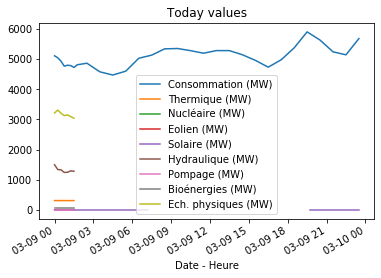

In [59]:
# Today values
today = datetime.combine(date.today(), datetime.min.time())
dailyData = data.loc[data['Date'] == today][['Date - Heure']+volumeLabels]
dailyData.plot(x='Date - Heure', title="Today values")
plt.show()

In [60]:
def getExtremums(data, key):
    dailyData = getDailyData(data, 'Date - Heure', volumeLabels) # get dataframes per day
    min_serie = data.loc[data[key] == min(data[key])]['Date'] # Date column of data's serie where data[key] is min
    min_df = dailyData[pd.to_datetime(min_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    max_serie = data.loc[data[key] == max(data[key])]['Date'] # Date column of data's serie where data[key] is max
    max_df = dailyData[pd.to_datetime(max_serie.values[0]).strftime('%Y-%m-%d')] # cell's value (date) to string
    return min_df, max_df

In [61]:
min_serie = data.min()
max_serie = data.max()
min_df = data.loc[data['Date'] == min_serie['Date']][['Date - Heure']+volumeLabels]
max_df = data.loc[data['Date'] == max_serie['Date']][['Date - Heure']+volumeLabels]

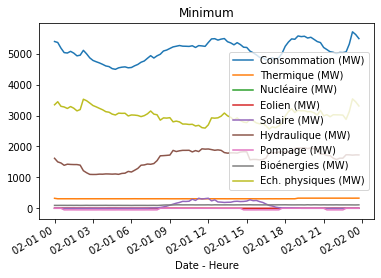

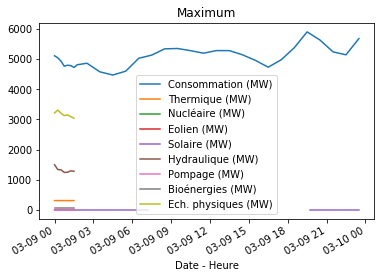

In [62]:
max_value = max_serie['Consommation (MW)']
min_value = min_serie['Consommation (MW)']
min_df.plot(x='Date - Heure', title="Minimum")
max_df.plot(x='Date - Heure', title="Maximum")
plt.show()

In [63]:
avg_df = data.mean()
avg_df

Code INSEE région        93.000000
Consommation (MW)      5181.285714
Thermique (MW)          988.402930
Nucléaire (MW)                 NaN
Eolien (MW)              13.809497
Solaire (MW)            175.557254
Hydraulique (MW)       1642.158073
Pompage (MW)             -8.387151
Bioénergies (MW)         94.087912
Ech. physiques (MW)    2268.568047
TCO Thermique (%)        18.677704
TCH Thermique (%)        30.108383
TCO Nucléaire (%)              NaN
TCH Nucléaire (%)              NaN
TCO Eolien (%)            0.266437
TCH Eolien (%)           28.769789
TCO Solaire (%)           3.393113
TCH Solaire (%)          13.210492
TCO Hydraulique (%)      31.677430
TCH Hydraulique (%)      50.245399
TCO Bioénergies (%)       1.828825
TCH Bioénergies (%)      32.110907
Column 26                      NaN
dtype: float64

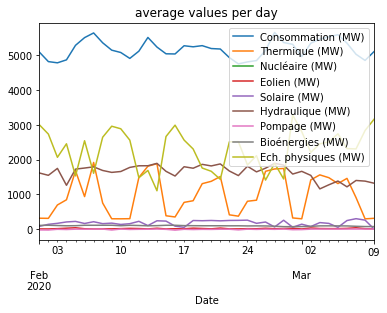

In [64]:
# average values per day
avg_day = data[['Date'] + volumeLabels].groupby(['Date']).agg(np.mean)
avg_day.plot(title="average values per day")
plt.show()

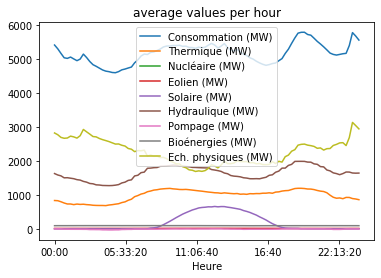

In [65]:
# average values per hour
avg_hr = data[['Heure'] + volumeLabels].groupby(['Heure']).agg(np.mean)
ax = avg_hr.plot(title="average values per hour")
plt.show()

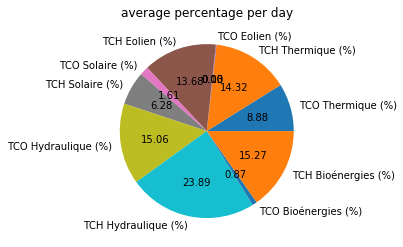

In [66]:
# average percentage per day
percent_df = data[percentLabels].mean()
ax = percent_df.plot(autopct='%.2f', kind='pie', title='average percentage per day')
ax.set_ylabel('')
plt.show()